$Atividade (2.5):$ Utilizando o conjunto de dados MNIST realize as seguintes atividades:
<ol>
    <li>Tente alcançar uma acurácia acima de 97% no conjunto de teste com KNeighborsClassifier, ajustando os hiperparâmetros 'weights' e 'n_neighbors' com o grid search </li>
    <li>Escreva uma função que modifique apenas as imagens de treinamento do dataset deslocando um pixel em de cada imagem em qualquer direção (esquerda, direita, para cima ou para baixo), ou seja, para cada imagem no conjunto de treinamento, quatro imagens deslocadas são criadas e as adicione ao conjunto de treinamento. Em seguida, treine seu melhor classificador com o novo conjunto aumentado. Finalmente, meça o desempenho do modelo através das métricas acurácia, precisão, revocação e F1-score. Dica: investigue a função shift() do módulo scipy.ndimage.interpolation para deslocar o pixel. </li>
</ol>

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score


## Adquirindo dados

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1,cache=True)
mnist.target = mnist.target.astype(np.int8)#transforma labels em string para int

In [3]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [4]:
mnist.data.shape

(70000, 784)

In [5]:
mnist.target.shape

(70000,)

In [6]:
x, y = mnist['data'],mnist['target']

In [7]:
# Atribuindo os valores, pois vem como Pandas
try:
    x = x.values
    y = y.values
except:
    pass

In [8]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

In [10]:
digito = x[20000].reshape(28,28)

## Visulizando os dados

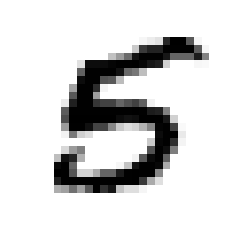

In [11]:
plt.imshow(digito,cmap=mpl.cm.binary,interpolation='nearest') # Visualizando o dado
plt.axis('off')
plt.show()

In [12]:
y[20000]

5

## Pre-processamento

In [13]:
x_train,y_train,x_test,y_test = x[:60000],y[:60000],x[60000:],y[60000:]

In [14]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int8)

In [15]:
x_train.shape

(60000, 784)

In [16]:
y_train.shape

(60000,)

In [17]:
index = np.random.permutation(60000)
x_train,y_train = x_train[index],y_train[index]

In [18]:
index2 = np.random.permutation(10000)
x_test,y_test = x_test[index2],y_test[index2] 

## Treinando o modelo

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
kng = KNeighborsClassifier()
kng.fit(x_train,y_train)
prediction = kng.predict(x_test)
print('Acuracia:',accuracy_score(y_test,prediction))

Acuracia: 0.9688


## Ajustando o modelo

In [21]:
from sklearn.model_selection import GridSearchCV # Ajustando o modelo

In [22]:
param_grid = {
    'n_neighbors' : [1,3,5],
    'weights' : ['uniform', 'distance'],
    'n_jobs' : [-1],
} 
# Definindo os sets de parametros

In [23]:
kng = KNeighborsClassifier() # Instanciando o modelo


In [24]:
# Definindo o GridSearch com modelo e os sets de parametros
grid_search = GridSearchCV(kng,param_grid,cv=5,scoring='accuracy') 
grid_search.fit(x_train,y_train) # Treinando o modelo

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1], 'n_neighbors': [1, 3, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [25]:
grid_search.best_params_

{'n_jobs': -1, 'n_neighbors': 3, 'weights': 'distance'}

In [26]:
# Instanciando o modelo com os melhores parametros
kng = KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=3, p=2,
                                            weights='distance')
kng.fit(x_train,y_train) # Treinando o modelo 
prediction = kng.predict(x_test) # Fazendo as predicoes
print("Acuracia:",accuracy_score(prediction,y_test))


Acuracia: 0.9717


## Deslocando pixels das imagens

In [18]:
# Função de deslocamento de pixel
def desloc_pix(x):
    # x = entrada, 1 = O número de lugares pelos quais os elementos são deslocados,
    # axios = eixo onde vai ser mudado a posicao, 0 vertical, 1 horizontal 
    down = np.roll(x, 1, axis=0)
    up = np.roll(x, -1, axis=0)
    right = np.roll(x, 1, axis=1)
    left = np.roll(x, -1, axis=1)
    
    final = np.concatenate([x,up,down,left,right])
    
    
       
    return final

x_train2 = desloc_pix(x_train)
y_train2 = np.concatenate([y_train,y_train,y_train,y_train,y_train])

In [25]:
print(x_train2.shape)
print(y_train2.shape)

(300000, 784)
(300000,)


In [19]:
# Fazendo a aleotariedade dos dados
index = np.random.permutation(300000)
x_train2,y_train2 = x_train2[index],y_train2[index]

## KNN

In [29]:
# Treinando o modelo com o conjuto de dados aumentado 
# algorithm = tentará decidir o algoritmo mais apropriado
# leaf_size = Tamanho da folha passado para BallTree ou KDTree.
# metric = Métrica a ser usada para cálculo de distância. O padrão é “minkowski”
# metric_params = Argumentos de palavra-chave adicionais para a função de métrica.
# n_jobs = O número de trabalhos paralelos a serem executados para pesquisa de vizinhos
# n_neighbors = Número de vizinhos a serem usados ​​por padrão para consultas.
# p = Parâmetro de potência para a métrica Minkowski.
# weights = Função de peso usada na previsão. 
kng = KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=3, p=2,
                                            weights='distance')
kng.fit(x_train2,y_train2) # Treinando o modelo 
prediction = kng.predict(x_test) # Fazendo a predicao



In [28]:
print("Acuracia:",accuracy_score(prediction,y_test))
print("Precisão:",precision_score(prediction,y_test,average='weighted'))
print("Revocação:",recall_score(prediction,y_test,average='weighted'))
print("F1_score:",f1_score(prediction,y_test,average='weighted'))

Acuracia: 0.5928
Precisão: 0.6781875515806981
Revocação: 0.5928
F1_score: 0.5990163716267394


In [20]:
kng = KNeighborsClassifier() # instanciando o modelo
kng.fit(x_train2,y_train2) # treinando o modelo 
prediction = kng.predict(x_test) # fazendo a predicao
print('Acuracia:',accuracy_score(y_test,prediction))

Acuracia: 0.8147


## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth= 30, n_estimators= 300, n_jobs= -1) #instanciando o modelo
rf.fit(x_train2,y_train2) # treinando o modelo
prediction = rf.predict(x_test) # fazendo a predicao

In [30]:
print("Acuracia:",accuracy_score(prediction,y_test))
print("Precisão:",precision_score(prediction,y_test,average='weighted'))
print("Revocação:",recall_score(prediction,y_test,average='weighted'))
print("F1_score:",f1_score(prediction,y_test,average='weighted'))

Acuracia: 0.9742
Precisão: 0.97427368113257
Revocação: 0.9742
F1_score: 0.9742210080418643
